# Aplicaciones de Minería de Datos II
## Lectura 4: Pre-procesamiento en datos categóricos
### Ocubre, 2023

### Introducción
<p>El semestre pasado se inició un panorama general de Minería de Datos y Aprendizaje Máquina con diferentes conjuntos de datos relacionados a software malicioso. Algunos de los temas abordados:</p>

<ul>
      <li>Exploración y Visualización de un Conjunto de Datos</li>
   <li> Medidas de Similitud y  Distancia</li>
    <li>Agrupamiento de Datos</li>
    <li>Introducción al Aprendizaje Máquina</li>
    <li>Neuronas lineales adaptativas y la convergencia del aprendizaje</li>
</ul>

En la siguiente Figura, se muestra un resumen del curso anterior:

![title](1.png)

## ¿Qué hay de novedoso en este curso?

<ul>
    <li>Pre-procesamiento de Datos</li>
    <li>Aplicaciones de Big Data</li>
    <li> Introducción a sistemas de recomendación y expertos</li>
    <li>Gestión de incertidumbre y lógica difusa</li>
    <li>Nuevos enfoques de Minería de Datos</li>
</ul>



### Pre-procesamiento de Datos

<p>¡Bienvenid@s al mundo real!</p>
<p>¡Sin datos de calidad, no hay resultados de minería de calidad!</p>
<p>El preprocesamiento es uno de los pasos más importantes de la minería de datos</p>
<p><b>Las fuentes de datos en el área de ciberseguridad son difíciles de analizar</b></p>
<p>Beneficios del pre-procesamiento de datos</p>
<ul>
    <li>¡Menos datos! Los métodos de minería de datos pueden aprender más rápido</li>
    <li>¡Mayor precisión! Los métodos de minería de datos pueden generalizar mejor</li>
    <li>¡Resultados simples! Los resultados simples son más fáciles de entender</li>
    <li>¡Menos atributos! Se puede ahorrar tiempo/complejidad eliminando las características redundantes e irrelevantes</li>
</ul>

Algunas de las tareas más importantes de pre-procesamiento.
![title](2.png)

<p><b>¿Qué es un dato sucio?</b> Los datos incompletos, ruidosos e inconsistentes son
propiedades habituales de las grandes bases de datos del mundo real
    bases de datos del mundo real y <b>más en ciberseguridad.</b></p>
<p><b>¿Qué involucra la limpieza de datos?</b></p>
<ul>
<li> Rellenar los valores que faltan </li>
<li> Datos ruidosos (valores incorrectos) </li>
<li> Identificar los valores atípicos y suavizar los datos ruidosos </li>
</ul>

<p><b>¿Qué es la integración de datos?</b></p>
<ul>
    <li>Integración de esquemas y correspondencia de objetos
        <ul>
            <li>Problema de identificación de entidades</li>
        </ul>
    </li>
    <li>Los datos redundantes (entre atributos) se producen a menudo cuando hay
integración de múltiples bases de datos
        <ul>
            <li>Los atributos redundantes pueden detectarse mediante análisis de correlación y el método de chi cuadrado</li>
        </ul>
    </li>
    </ul>
<p><b>¿Qué es un dato redundante?</b> Si un atributo puede <i>derivarse</i> de otro o de un conjunto de atributos, puede ser redundante</p>

<p><b>¿Qué es Chi square Test?</b></p>
<ul>
    <li>Para los datos categóricos (discretos), una relación de correlación
entre dos atributos, $A$ y $B$, puede descubrirse mediante una $\chi^2$</li>
    <li>Dado el grado de libertad, el valor de $\chi^2$ se utiliza para
decidir la correlación en función de un nivel de significación</li>
</ul>

### Trabajando con tweets - Análisis de sentimiento

<p>Una forma de aplicar los concpetos de pre-procesamiento y limpieza, es mediante el análisis de <i>tweets</i>. El análisis de sentimientos, una técnica comunmente empleada en <i>tweets</i>, puede definirse como un proceso que automatiza la extracción de actitudes, opiniones, puntos de vista y emociones a partir de texto, voz, tweets y fuentes de bases de datos mediante el Procesamiento Natural del Lenguaje (PLN). El análisis de sentimientos consiste en clasificar las opiniones del texto en categorías como <i>positivo</i>, <i>negativo</i> o <i>neutral</i>.</p>

In [2]:
import sys
#Quitar comentarios para instalar las bibliotecas
# Instalar nltk
# El Natural Language Toolkit (NLTK) es una plataforma utilizada para construir programas en Python 
# que trabajan con datos del lenguaje humano para aplicarlos en el procesamiento estadístico
# del lenguaje natural (NLP).
%pip install nltk
# Biblioteca para limpiar el texto de emoticones
%pip install clean-text
# Instalar el generador de nubes de palabras
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Ejemplo 1: Toxic Tweets

<p>Kaggle ha desarrollado  un interesante concurso para poder clasificar la toxicidad de tweets: un conjunto de datos equilibrado de tuits que contienen expresiones de odio y lenguaje ofensivo.</p>

![title](4.jpeg)

<p><a href="https://www.kaggle.com/datasets/ashwiniyer176/toxic-tweets-dataset">Enlace a Toxic Tweets</a></p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Biblioteca de expresiones regulares
import re
#Biblioteca para interactuar con el sistema operativo
import io
#Biblioteca para trabajar con cadenas de caracteres
import string
import numpy as np
#De la biblioteca clantext importar el método clean
from cleantext import clean

tweets = pd.read_csv('../datasets/FinalBalancedDataset.csv')

In [2]:
tweets.head()
#tweet_original = tweets['tweet'][0]

Unnamed: 0  Toxicity                                              tweet
0           0         0   @user when a father is dysfunctional and is s...
1           1         0  @user @user thanks for #lyft credit i can't us...
2           2         0                                bihday your majesty
3           3         0  #model   i love u take with u all the time in ...
4           4         0             factsguide: society now    #motivation

In [3]:
#dimensión del dataset
tweets.shape

(56745, 3)

In [4]:
np.unique(tweets['Toxicity'])

array([0, 1])

In [5]:
print("Tweets bonitos",tweets[tweets['Toxicity']==0].shape[0])

Tweets bonitos 32592


In [6]:
print("Tweets tóxicos",tweets[tweets['Toxicity']==1].shape[0])

Tweets tóxicos 24153


<p><b>¿Qué es la limpieza de datos en tweets?</b> Los tweets son anti-gramaticales. La limpieza de datos en el análisis de sentimientos es el proceso de eliminar los valores redundantes e incorrectos en los datos que se destinan al análisis.</p>

In [7]:
def limpieza_tweet(tweet):
    
    text = re.sub(r'@[A-Za-z0-9]+','',tweet) # remover @menciones
    text = re.sub(r'#','',text)             # remover el símbolo de hashtags
    text = re.sub(r'RT[\s]+','',text)  # remover símbolo RT
    text = re.sub(r'\d+', '', text) #remover números
    text = clean(text, no_emoji=True) #remover emoticones
    text=re.sub(r'https?:\/\/\S+','',text) # remover https en urls
    text = text.lower() #regresar a minúsculas el texto
    translate_table = dict((ord(char), None) for char in string.punctuation) #remover puntuaciones
    text = text.translate(translate_table)
    
    return text

In [8]:
tweet_original = tweets['tweet'][0]

In [9]:
tweets['tweet'] = tweets['tweet'].apply(limpieza_tweet)
tweets.head()
tweet_timpio = tweets['tweet'][0]
print(tweet_timpio)

when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run


<p><b>¿Qué es la remoción de palabras en blanco (vacía)?</b> La eliminación de las palabras en blanco es uno de los pasos de preprocesamiento más utilizados en diferentes aplicaciones de NLP. Se trata simplemente de eliminar las palabras que aparecen comúnmente en todos los documentos del corpus, mismas que no tiene la suficiente fuerza gramatical.</p>

In [10]:
import nltk
nltk.download('punkt')
# Biblioteca para listar las palabras vacías (stop words)
from nltk.corpus import stopwords
# Bilioteca para contar palabras
from collections import Counter
# Descargar el catálogo de stop-words
nltk.download('stopwords')
# Invocar el tokenizador de oraciones
from nltk.tokenize import word_tokenize
# Seleccionar el idioma de las palabras vacías (stop words)
stop_words = stopwords.words('english')
# Crear un diccionario de stop words
stopwords_dict = Counter(stop_words)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aldohernandez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aldohernandez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<p><b>¿Qué es tokenizar el texto?</b> La tokenización en palabras simples es el proceso de dividir una frase, oración, párrafo, uno o varios documentos de texto en unidades más pequeñas. Cada una de estas unidades más pequeñas se llama token. Los tokens pueden ser cualquier cosa: una palabra, una subpalabra o incluso un carácter</p>

In [11]:
def tokenizar(tweet):
    #1-gramo->hola,2-gramo->hola,mundo,3-gramo->hola,mundo,adios 
    return word_tokenize(tweet)

In [12]:
tweets['tweet'] = tweets['tweet'].apply(tokenizar)

In [13]:
tweets['tweet'].head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, lyft, credit, i, cant, use, caus...
2                              [bihday, your, majesty]
3    [model, i, love, u, take, with, u, all, the, t...
4               [factsguide, society, now, motivation]
Name: tweet, dtype: object

In [14]:
tweet_tokenizado = tweets['tweet'][0]
print(tweet_tokenizado)

['when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', 'run']


In [15]:
def eliminar_stop_word(tweet):
    texto_sin_sw = [word for word in tweet if word not in stopwords_dict]
    return texto_sin_sw

In [16]:
tweets['tweet'] = tweets['tweet'].apply(eliminar_stop_word)

In [17]:
tweets['tweet'].head()
tweet_stop_words = tweets['tweet'][0]
print(tweet_stop_words)

['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run']


In [18]:
print(tweet_original)
print(tweet_timpio)
print(tweet_tokenizado)
print(tweet_stop_words)

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run
['when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', 'run']
['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run']


In [16]:
from nltk.stem import WordNetLemmatizer

### Integración: Lematización
<p>La lematización es la agrupación de diferentes formas de una misma palabra. En las consultas de búsqueda, la lematización permite a los usuarios finales consultar cualquier versión de una palabra base y obtener resultados relevantes.</p>

In [17]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
  
lemmatizer = WordNetLemmatizer()
def lematizar(tweet):
    return [lemmatizer.lemmatize(t) for t in tweet]

[nltk_data] Downloading package wordnet to /Users/labsepi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/labsepi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [18]:
tweets['tweet'] = tweets['tweet'].apply(lematizar)

In [19]:
tweet_lematizado = tweets['tweet'][0]
print(tweet_lematizado)

['father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction', 'run']


### Nube de palabras

<p>Las nubes de palabras (también conocidas como nubes de texto o nubes de etiquetas) funcionan de forma sencilla: cuanto más aparezca una palabra específica en una fuente de datos textuales (como un discurso, una entrada de blog o una base de datos), más grande y más llamativa aparecerá en la nube de palabras.</p>


In [19]:
import numpy as np
#Generar una lista con todas las palabras
todas = ' '.join(np.hstack([t for t in tweets['tweet'].values]))

In [21]:
# Transformar una lista multidimensional a una lista horizontal
#np.hstack([[1,2,4],[1,2,4]])

array([1, 2, 4, 1, 2, 4])

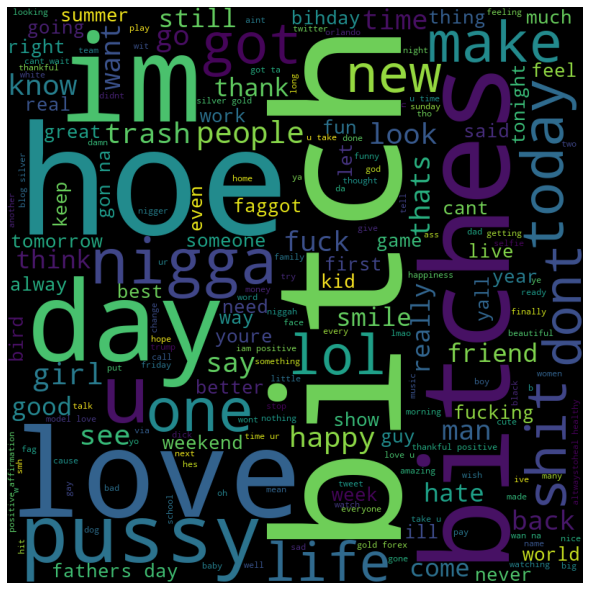

In [22]:
import wordcloud

wordcloud = wordcloud.WordCloud(width = 800, height = 800,background_color ='black',min_font_size = 10).generate(todas)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Transformación: Stemming

<p>El <i>stemming</i> es el proceso de reducir la inflexión de las palabras a sus formas raíz, como la asignación de un grupo de palabras a la misma raíz, incluso si la propia raíz no es una palabra válida en su lenguaje</p>

### Transformación: Recordando TF-IDF
<p>TF-IDF (frecuencia de términos-frecuencia inversa de documentos) es una medida estadística que evalúa la relevancia de una palabra en un documento de una colección de documentos.</p>

\begin{equation}
w_{token,tweet} = tf_{token,tweet} \times \textbf{log} \frac{N}{df_{token}}
\end{equation}

<p>, donde $w_{token,tweet}$, es el token a transformar,$tf_{token,tweet}$ es la frecuencia de un token en un tweet, $df_{token}$ es el número de tweets que contienen al token y $N$ el número total de documentos.

In [23]:
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
nltk.download('words') 
words = set(nltk.corpus.words.words())
porter = PorterStemmer()

#reduce a raíz gramatical, si la palabra existe en in diccionaro
def porter_stemmer(tweets):
    return [porter.stem(t) for t in tweets]
#regresa tokens a oración: ['a','b','c'] => a b c
def tokens2oracion(tweets):
    return ' '.join(t for t in tweets)

#Transformación a tf-idf
tfidf = TfidfVectorizer()
tweets['tweet'] = tweets['tweet'].apply(porter_stemmer)
tweets_tf = tfidf.fit_transform(tweets['tweet'].apply(tokens2oracion)).toarray()

[nltk_data] Downloading package words to
[nltk_data]     /Users/aldohernandez/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [24]:
tweet_stem = tweets['tweet'][0]
print("Tweet original:",tweet_original)
print("Tweet limpio:",tweet_timpio)
print("Tweet tokenizado:",tweet_tokenizado)
print("Tweet sin palabras en blanco:",tweet_stop_words)
print("Tweet lematizado y reducido:",tweet_stem)
print("Tweet transformado a pesos(valores reales):")

for t in tweet_stem:
    print(t,':',tfidf.idf_[tfidf.vocabulary_[t]])

Tweet original:  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
Tweet limpio: when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run
Tweet tokenizado: ['when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', 'run']
Tweet sin palabras en blanco: ['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run']
Tweet lematizado y reducido: ['father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct', 'run']
Tweet transformado a pesos(valores reales):
father : 5.318299072098464
dysfunct : 10.847728159609886
selfish : 8.688243910256514
drag : 8.650503582273668
kid : 5.906085737000582
dysfunct : 10.847728159609886
run : 6.184289065497819


### Aprendizaje supervisado: determinando a que tweet pertenece a cada categoría

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tweets_tf,  tweets['Toxicity'], test_size=0.33, random_state=42)

In [45]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Activation
import warnings

classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', 
                     activation = 'relu', input_dim = X_train.shape[1]))

classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'tanh'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
3802/3802 [==============================] - 9s 2ms/step - loss: 0.3283 - accuracy: 0.8861
Epoch 2/10
3802/3802 [==============================] - 6s 2ms/step - loss: 0.1149 - accuracy: 0.9604
Epoch 3/10
3802/3802 [==============================] - 6s 2ms/step - loss: 0.0949 - accuracy: 0.9764
Epoch 4/10
3802/3802 [==============================] - 7s 2ms/step - loss: 0.0781 - accuracy: 0.9839
Epoch 5/10
3802/3802 [==============================] - 6s 2ms/step - loss: 0.0659 - accuracy: 0.9891
Epoch 6/10
3802/3802 [==============================] - 6s 2ms/step - loss: 0.0643 - accuracy: 0.9916
Epoch 7/10
3802/3802 [==============================] - 6s 2ms/step - loss: 0.0615 - accuracy: 0.9933
Epoch 8/10
3802/3802 [==============================] - 6s 2ms/step - loss: 0.0591 - accuracy: 0.9931
Epoch 9/10
3802/3802 [==============================] - 6s 2ms/step - loss: 0.0543 - accuracy: 0.9948
Epoch 10/10
3802/3802 [==============================] - 6s 2ms/step - loss: 0.054

In [46]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = classifier.predict(X_test)

586/586 [==============================] - 3s 4ms/step


In [47]:
print("ACCURACY",accuracy_score(y_test, np.ceil(y_pred)))

ACCURACY 0.9018476983872691


In [48]:
print(classification_report(y_test,np.ceil(y_pred)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     10736
           1       0.86      0.93      0.89      7990

    accuracy                           0.90     18726
   macro avg       0.90      0.91      0.90     18726
weighted avg       0.90      0.90      0.90     18726



In [30]:
for tf_tweet,tweet in zip(X_test[0:10],tweets['tweet'][0:10]):
    if 1 in np.ceil(classifier.predict(tf_tweet.reshape(1, 43987))):
        print(tweet,'Tweet grosero')
    else:
        print(tweet,'Tweet bonito')

['father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct', 'run'] Tweet grosero
['thank', 'lyft', 'credit', 'cant', 'use', 'caus', 'dont', 'offer', 'wheelchair', 'van', 'pdx', 'disapoint', 'getthank'] Tweet grosero
['bihday', 'majesti'] Tweet grosero
['model', 'love', 'u', 'take', 'u', 'time', 'ur'] Tweet grosero
['factsguid', 'societi', 'motiv'] Tweet grosero
['huge', 'fan', 'fare', 'big', 'talk', 'leav', 'chao', 'pay', 'disput', 'get', 'allshowandnogo'] Tweet grosero
['camp', 'tomorrow', 'danni'] Tweet grosero
['next', 'school', 'year', 'year', 'exam', 'cant', 'think', 'school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'] Tweet grosero
['love', 'land', 'allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'] Tweet grosero
['welcom', 'im', 'gr'] Tweet grosero


<p>El ejemplo anterior muestra una aplicación de limpieza, integración y evaluación de datos, desde la perspectiva de Procesamiento Natural del Lenguaje. ¿Pero por qué es importante en la cibserseguridad? En la siguiente figura se muestran algunas áreas aplicativas de cibser-seguridad donde se aplica ampliamente la Inteligencia Artificial</p>

![title](3.png)

<ul>
    <li>Las cajas blancas representan aplicaciones que utilizan la recopilación y generación de información automatizada que puede utilizarse para atacar o defender.</li>
    <li>Las cajas guindas corresponden a aplicaciones en las que NLP puede ser utilizado por los defensores para reforzar la postura de defensa perimetral o de host.</li>
    <li>Las cajas verdes representan aplicaciones que apoyan la automatización de algunas operaciones de seguridad básicas y actividades de cumplimiento.
</li>
</ul>


<p><center><i>"El poder de la ciberseguridad no es el escenario de Pearl Harbor."</i></center></p>

<p><center><i>" El verdadero poder está en la información"</i></center></p>

<ul>
     <li>En los últimos años, hemos visto resultados sorprendentes en la generación de información con aprendizaje automático, como texto, sonido o imágenes. </li>
    <li>El modelo <b>NLP GPT-4</b> de <b>OpenAI</b> ha sido aparentemente liberado sólo de forma parcial <span style="color:red">debido a las preocupaciones sobre los grandes modelos de lenguaje que se utilizan para generar lenguaje engañoso, sesgado o abusivo a escala.</span>
        <li>Recordando el objetivo de cibserseguridad e Inteligencia Artificial: una herramienta que ayude a generar alertas de amenazas, identificar nuevos tipos de malware y proteger los datos sensibles de las organizaciones, reduciendo la tasa de falsos positivos.</li>
    </ul>


# Ejercicio 

<p>Realiza un proceso de análisis de sentimiento a tweets considerados sospechosos:</p>
<p><i>
    El desarrollo rápido en tecnología donde todo está a solo un clic de distancia; nos conecta globalmente. A pesar de todos los aspectos positivos de esta tecnología moderna, también aumenta el riesgo de seguridad. La ciberseguridad se convierte en una preocupación crítica ahora. Internet ofrece facilidades en cualquier momento y lugar, lo que brinda a algunas personas la ventaja para un uso ilegal de este, como el ciberacoso, las amenazas y el terrorismo. El acoso en línea, que se ha convertido en el delito más común, puede presentarse en diversas formas más allá del lenguaje abusivo. El número de delitos cibernéticos que ponen en peligro la vida ha aumentado tremendamente y se ha reconocido como una amenaza social.

El conjunto de datos de tweets sospechosos se recopiló de Twitter y contiene casi 60 mil tweets. Si hablamos de lo sospechoso, es un término muy amplio. El etiquetado de este conjunto de datos se basa en tres categorías principales que son: ciberacoso, terrorismo y amenazas. Por lo que:</i></p>
<ul>
    <li>0 = sospechoso</li>
    <li>1 = no sospechoso.</li>
</ul>
<p><b>Instrucciones </b></p>
<ul>
    <li>Pre-procesa el contenido</li>
    <li>Genera el pipeline de TF-IDF + Random Forest + K-fold-cross-validation con $10$ fojas.</li>
     <li>Transforma los datos mediante TF-IDF y entrena con una arquitecrura de red neuronal profunda con $\mathbb{R}^{1\times64}$ y $\mathbb{R}^{1\times32}$ neuronas para las dos capas ocultas, utiliza como función de activación sigmoide en la capa de salida.</li>
    <li>Genera las matrices de confusión y reportes de desempeño necesarios.</li>
    </ul>

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('../datasets/suspicious_tweets.csv')

In [3]:
dataset.head()

message  label
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...      1
1  is upset that he can't update his Facebook by ...      1
2  @Kenichan I dived many times for the ball. Man...      1
3    my whole body feels itchy and like its on fire       0
4  @nationwideclass no, it's not behaving at all....      1

In [6]:
dataset.shape

(60000, 2)